In [1]:
%matplotlib inline

In [2]:
from scipy import signal

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-25_223124_scan.npd/')

In [5]:
sweeps = [npd.read(name) for name in npd.node_names() if name.startswith('SweepArray')]
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(140.0, 132.0),
 (146.0, 117.0),
 (165.0, 139.0),
 (174.0, 168.0),
 (162.0, 153.0),
 (155.0, 148.0),
 (143.0, 135.0),
 (140.0, 144.0),
 (133.0, 162.0),
 (124.0, 168.0),
 (125.0, 162.0),
 (122.0, 152.0),
 (126.0, 145.0),
 (137.0, 131.0),
 (150.0, 128.0),
 (145.0, 123.0),
 (142.0, 116.0),
 (121.0, 102.0),
 (51.0, 39.0),
 (53.0, 47.0),
 (56.0, 38.0),
 (53.0, 40.0),
 (48.0, 46.0),
 (48.0, 51.0),
 (47.0, 60.0),
 (47.0, 50.0),
 (45.0, 48.0),
 (45.0, 49.0),
 (38.0, 50.0),
 (33.0, 53.0),
 (30.0, 53.0),
 (23.0, 58.0),
 (27.0, 54.0),
 (29.0, 47.0),
 (34.0, 48.0),
 (38.0, 45.0),
 (41.0, 42.0),
 (45.0, 37.0),
 (44.0, 24.0),
 (45.0, 28.0),
 (41.0, 32.0),
 (37.0, 32.0),
 (35.0, 35.0),
 (33.0, 37.0),
 (30.0, 42.0),
 (24.0, 42.0),
 (25.0, 45.0),
 (30.0, 42.0),
 (35.0, 38.0),
 (39.0, 34.0),
 (39.0, 32.0),
 (40.0, 25.0),
 (38.0, 23.0),
 (41.0, 25.0),
 (37.0, 27.0),
 (38.0, 29.0),
 (37.0, 38.0),
 (31.0, 40.0),
 (24.0, 39.0),
 (21.0, 37.0),
 (23.0, 37.0),
 (20.0, 37.0),
 (24.0, 39.0),
 (28.0, 43.0),
 (35

In [7]:
def remove_background(f, s21, amp_degree=4, phi_degree=4, weights=None):
    if weights is None:
        weights = np.abs(s21)**2
    amp_poly = np.polyfit(f, np.abs(s21), deg=amp_degree, w=weights)
    phi_poly = np.polyfit(f, np.unwrap(np.angle(s21)), deg=phi_degree, w=weights)
    return s21 / (np.polyval(amp_poly, f) * np.exp(1j * np.polyval(phi_poly, f)))

# Raw data

/home/flanigan/miniconda2/envs/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


(-20, 0)

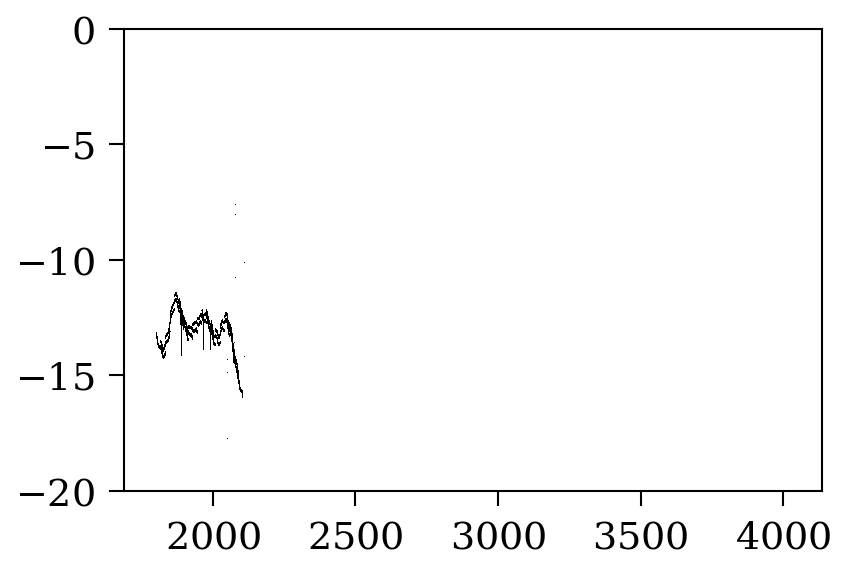

In [8]:
fig, ax = plt.subplots()
for sa in sweeps:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
ax.set_ylim(-20, 0)